In [1]:
import pandas as pd
data=pd.read_csv('311_Service.csv')

In [2]:
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
data.columns

Index(['Unnamed: 0', 'Unique Key', 'Created Date', 'Closed Date', 'Agency',
       'Agency Name', 'Complaint Type', 'Descriptor', 'Location Type',
       'Incident Zip', 'Incident Address', 'Street Name', 'Cross Street 1',
       'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location',
       'Request_closing_time'],
      dtype='object')

In [4]:
data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
data.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [6]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_closing_time
0,32310363,12/31/2015 23:59,1/1/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:56:00.000000000
1,32309934,12/31/2015 23:59,1/1/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:00.000000000
2,32309159,12/31/2015 23:59,1/1/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:52:00.000000000
3,32305098,12/31/2015 23:57,1/1/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:46:00.000000000
4,32306529,12/31/2015 23:56,1/1/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:28:00.000000000


### Calculataing the response time.

In [7]:
data['Created Date']=pd.to_datetime(data['Created Date'])

data['Closed Date']=pd.to_datetime(data['Closed Date'])

data['Request_closing_time']=pd.to_timedelta(data['Closed Date']-data['Created Date'])
data['Hrs']=data['Request_closing_time'].dt.total_seconds()/3600 # converting into hours

## Percentage Share of type of Complaints.

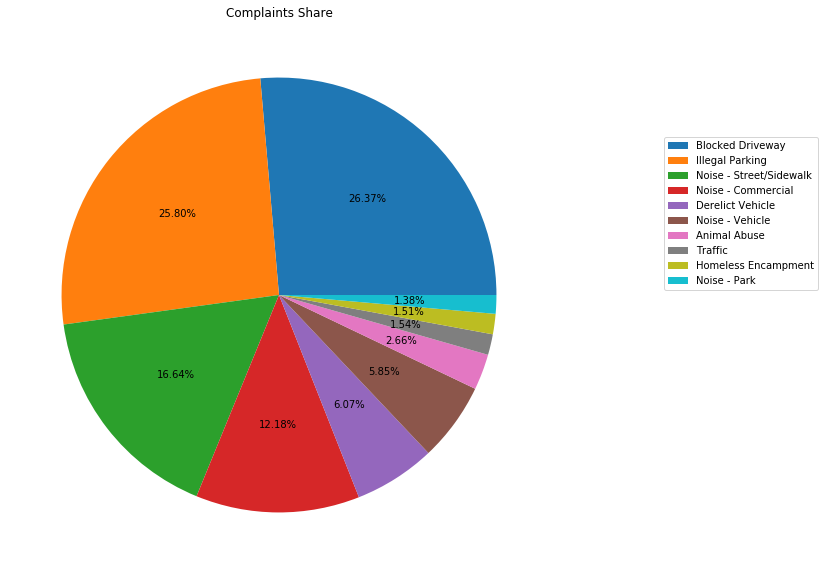

In [9]:
top_20=dict(data['Complaint Type'].value_counts())
Comp=list(top_20.keys())

plt.figure(figsize=(10,10))
plt.pie((data['Complaint Type'].value_counts()).head(10),autopct='%0.2f%%')
plt.legend(Comp,loc='lower right',bbox_to_anchor=(1.5,0.5))
plt.title("Complaints Share")
plt.show()



# Top  10 Complaints type reported

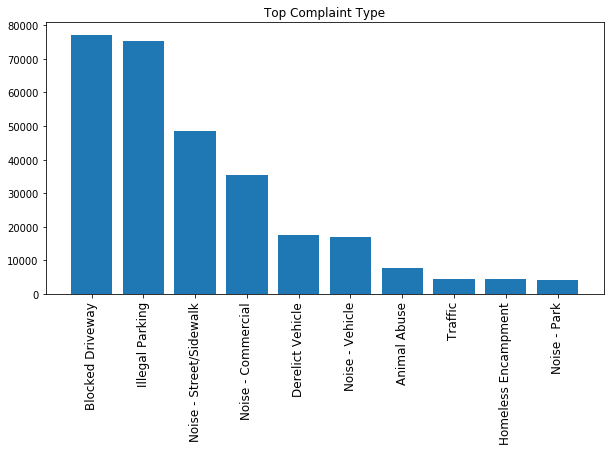

In [10]:
Comp_Ty=data['Complaint Type'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.bar(x=Comp_Ty.index,height=Comp_Ty.values)
plt.title("Top Complaint Type")
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

# Least complaint Type

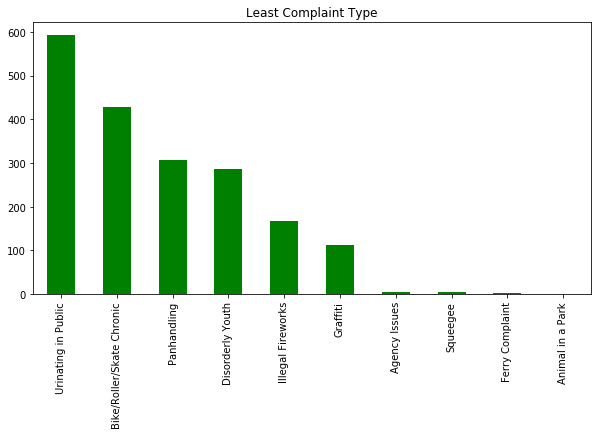

In [11]:
(data['Complaint Type'].value_counts().tail(10)).plot(kind='bar',figsize=(10,5),title="Least Complaint Type",color='green')
plt.show()

# Complaints Reported share across Citys of Newyork

In [12]:
C_res=data.City.value_counts().head(15)
TC=dict(data.City.value_counts().head(15))
Top_city=list(TC.keys())


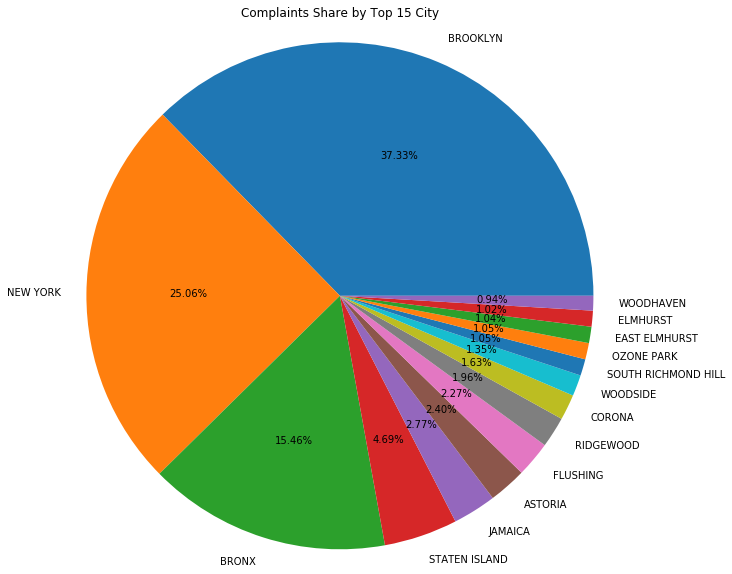

In [13]:
plt.figure(figsize=(10,10))
plt.pie(x=C_res,autopct='%0.2f%%',labels=C_res.index)
plt.axis('equal')
plt.title("Complaints Share by Top 15 City")
#plt.legend(C_r.index,loc='upper right', bbox_to_anchor=(2,0.5))
plt.show()

# Complaints Treands across the Boroughs of NewYork

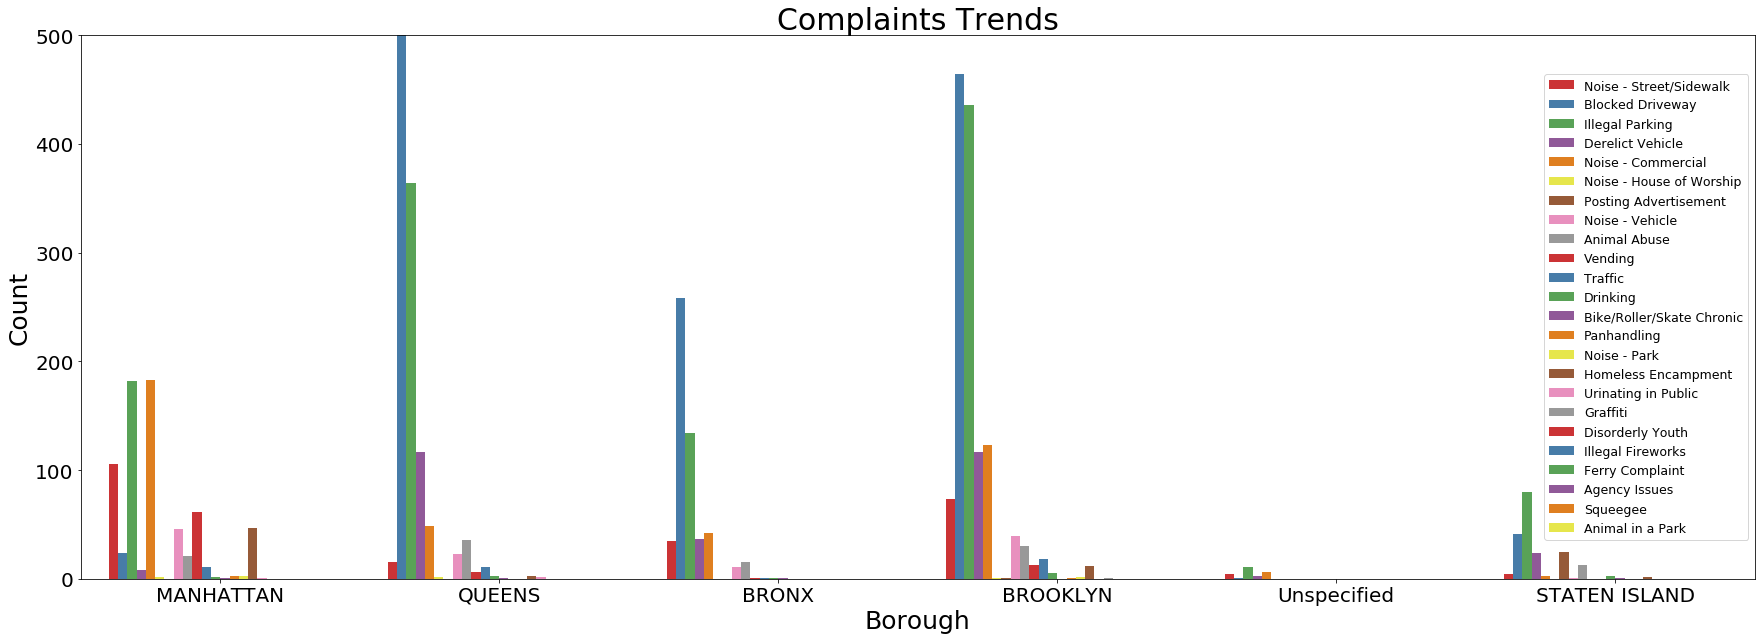

In [14]:
import seaborn as sns
plt.figure(figsize=(30,10))
sns.countplot(data.Borough.head(4000),hue=(data["Complaint Type"]),palette='Set1',linewidth=25)
plt.title("Complaints Trends",size=30)
plt.xlabel('Borough',size=25)
plt.ylabel("Count",size=25)
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylim((0,500))
plt.legend(loc=5,fontsize=12.5)
plt.show()


## Average Time  to solve by Complaint Types.

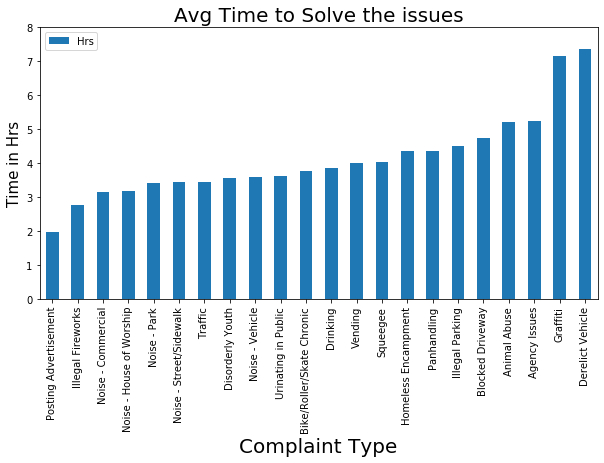

In [15]:
CT=data[['Complaint Type','Hrs']]
CT=CT.groupby(['Complaint Type']).mean().sort_values('Hrs',ascending=True)
CT.drop('Animal in a Park',axis=0,inplace=True)
CT.drop('Ferry Complaint',axis=0,inplace=True)


CT.plot.bar(figsize=(10,5))
plt.xticks(size=10,rotation=90)
plt.title("Avg Time to Solve the issues",size=20)
plt.ylabel('Time in Hrs',size=15)
plt.xlabel('Complaint Type',size=20)
plt.ylim((0,8))
plt.show()

In [16]:
data['Complaint Type'].value_counts()


Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [17]:
data['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [18]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_closing_time,Hrs
0,32310363,2015-12-31 23:59:00,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:56:00,0.933333
1,32309934,2015-12-31 23:59:00,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:27:00,1.450000
2,32309159,2015-12-31 23:59:00,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:52:00,4.866667
3,32305098,2015-12-31 23:57:00,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:46:00,7.766667
4,32306529,2015-12-31 23:56:00,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:28:00,3.466667


In [19]:
data.shape

(300698, 44)

In [20]:
data['Complaint Type'] = data['Complaint Type'].astype("category")

In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                           category
Descriptor                                 object
Location Type                              object
Incident Zip                              float64
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


In [23]:
data1 = data.drop(data[(data['Complaint Type'] == "Ferry Complaint")].index)
data1 = data1.drop(data1[(data1['Complaint Type'] == 'Animal in a Park')].index)

In [24]:
data1.shape

(300695, 44)

   # Hypothesis Testing
## Case 1: Average Responce Time across all complaints type is same or not

### H0 : Average Responce Time is same for all types of problems.
### Ha: Average responce time defers for complaints type.

In [25]:
data1['Hrs'].fillna(data1['Hrs'].mean(),inplace=True) #filling the empty set with Mean responce time
print('Average responce time is=%0.2f hrs'%(data1['Hrs'].mean()))

Average responce time is=4.31 hrs


In [26]:
CT=data1[['Complaint Type','Hrs']]

In [27]:
CT=CT.groupby(['Complaint Type']).mean().sort_values('Hrs',ascending=True)
CT

,Hrs
Complaint Type,
Posting Advertisement,1.982887
Illegal Fireworks,2.761806
Noise - Commercial,3.158011
Noise - House of Worship,3.195822
Noise - Park,3.415190
Traffic,3.449035
Noise - Street/Sidewalk,3.454752
Disorderly Youth,3.558333
Noise - Vehicle,3.591101


In [28]:
CT['Hrs'].fillna(CT['Hrs'].mean(),inplace=True)


In [29]:
from scipy.stats import chisquare

In [30]:
chisquare(CT)

Power_divergenceResult(statistic=array([8.07339961]), pvalue=array([0.99825013]))

## From Chisquare Test, P-value < 0.5. Hence we reject H0
### i,e. Average responce is different for each Responce Time.

# Case 2: Are the type of complaint or service requested and location related.

## H0= The Complaint and Location are related
## Ha= The Complaint and Locations are not related

In [31]:
data['Location Type'].dropna(inplace=True)

In [32]:
data['Location Type'].unique()

array(['Street/Sidewalk', 'Club/Bar/Restaurant', 'Store/Commercial',
       'House of Worship', 'Residential Building/House',
       'Residential Building', 'Park/Playground', 'Vacant Lot',
       'House and Store', 'Highway', 'Commercial', 'Roadway Tunnel',
       'Subway Station', 'Parking Lot', 'Bridge', 'Terminal', 'Ferry',
       'Park'], dtype=object)

In [33]:
df=data[['Complaint Type','Location Type']]

In [34]:
df=df.groupby(['Location Type']).count()

In [35]:
ct_freq=pd.crosstab(data['Complaint Type'],data['Location Type'])

In [36]:
ct_freq.T


Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,Homeless Encampment,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Location Type,,,,,,,,,,,,,,,,,,,,,
Bridge,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Club/Bar/Restaurant,0,0,0,0,0,0,366,0,0,0,...,0,0,0,0,0,0,0,0,21,0
Commercial,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ferry,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Highway,0,0,0,0,14,0,0,0,0,15,...,0,0,0,0,0,0,0,186,0,0
House and Store,93,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
House of Worship,0,0,0,0,0,0,0,0,0,0,...,929,0,0,0,0,0,0,0,0,0
Park,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Park/Playground,123,0,0,0,0,0,98,0,0,353,...,0,4041,0,0,6,0,0,0,38,106


In [37]:
from scipy.stats import chi2_contingency 

In [38]:
chi_square, p_value, dof,expected_freq=chi2_contingency(ct_freq)

In [39]:
chi_square,p_value

(1638407.580569627, 0.0)

In [40]:
dof

374

## The p-value is 0 , Hence we reject H0 
## i.e,: The complaint and locations are not related , We say that complaints are recived all over the location type irrsepctive of the type.